<a href="https://colab.research.google.com/github/ynaik16/Alpha-AI/blob/main/currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BANK NOTES CLASSIFICATION

The banknote dataset involves predicting whether a given banknote
is authentic given a number of measures taken from a photograph.
Description: The dataset contains 1,372 rows with 5 numeric variables. It is a
classification problem with two classes (binary classification).
Below provides a list of the five variables in the dataset.

1. variance of WaveletTransformed image (continuous).
2. skewness of Wavelet Transformed image (continuous).
3. kurtosis of Wavelet Transformed image (continuous).
4. entropy of image (continuous).
5. class (integer).

In [97]:
from google.colab import files
uploaded = files.upload()

Saving data_banknote_authentication.txt to data_banknote_authentication (1).txt


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [5]:
data = pd.read_csv("data_banknote_authentication.txt", header = None)
data.columns =['variance', 'skewness', 'kurtosis', 'entropy','class'] 
data

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
print(data.isnull())
print(data.isnull().sum().sum())

      variance  skewness  kurtosis  entropy  class
0        False     False     False    False  False
1        False     False     False    False  False
2        False     False     False    False  False
3        False     False     False    False  False
4        False     False     False    False  False
...        ...       ...       ...      ...    ...
1367     False     False     False    False  False
1368     False     False     False    False  False
1369     False     False     False    False  False
1370     False     False     False    False  False
1371     False     False     False    False  False

[1372 rows x 5 columns]
0


In [7]:
X = data.iloc[:,:4]
X

,variance,skewness,kurtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [8]:
y = data.iloc[:, 4]
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

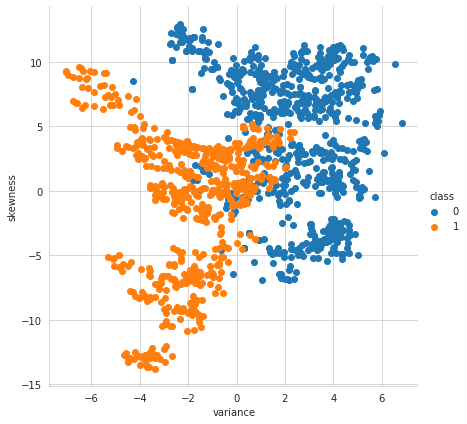

In [14]:
sns.set_style("whitegrid") 
sns.FacetGrid(data,hue = 'class',height = 6).map(plt.scatter,'variance','skewness').add_legend() 

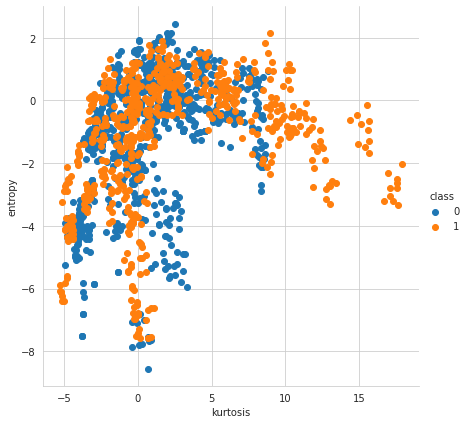

In [15]:
sns.set_style("whitegrid") 
sns.FacetGrid(data,hue = 'class',height = 6).map(plt.scatter,'kurtosis','entropy').add_legend() 

Comparing the two scatter plots above, we can observe that 'variance' and 'skewness' are linearly separable and therefore, we can classify our dataset easily based on these two attributes. 

On the other hand, 'kurtosis' and 'entropy' are linerary inseprarabe.


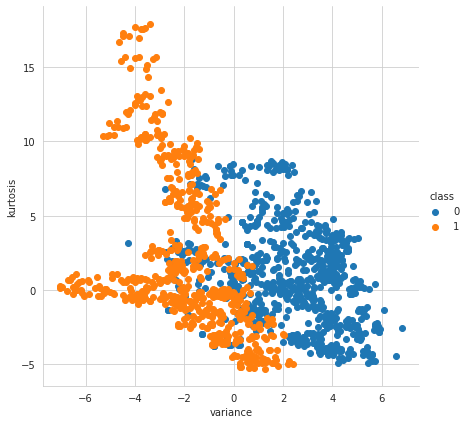

In [16]:
sns.set_style("whitegrid") 
sns.FacetGrid(data,hue = 'class',height = 6).map(plt.scatter,'variance','kurtosis').add_legend() 

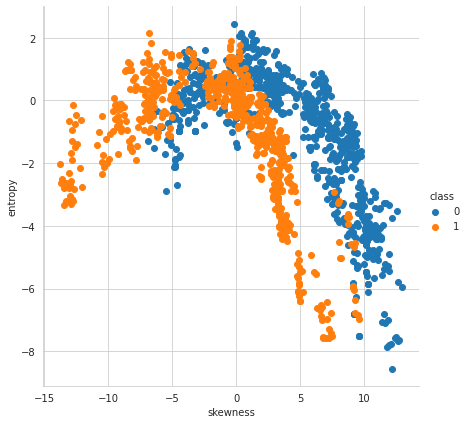

In [19]:
sns.set_style("whitegrid") 
sns.FacetGrid(data,hue = 'class',height = 6).map(plt.scatter,'skewness','entropy').add_legend() 

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [78]:
model = DecisionTreeClassifier(random_state = 0)

model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [79]:
model.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
y_pred = model.predict(X_test[0:10])
print(y_pred)
print(Y_test[:10])

[1 0 1 0 0 0 0 0 1 1]
1023    1
642     0
1196    1
31      0
253     0
535     0
184     0
758     0
1308    1
914     1
Name: class, dtype: int64


In [82]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, model.predict(X_test[:275]))
print(score)


0.9927272727272727


[Text(164.27686567164181, 203.85, 'X[0] <= 0.274\ngini = 0.495\nsamples = 1097\nvalue = [605, 492]'),
 Text(107.4358208955224, 176.67000000000002, 'X[1] <= 7.565\ngini = 0.294\nsamples = 524\nvalue = [94, 430]'),
 Text(74.95522388059702, 149.49, 'X[0] <= -0.459\ngini = 0.123\nsamples = 441\nvalue = [29, 412]'),
 Text(39.97611940298508, 122.31, 'X[2] <= 6.746\ngini = 0.058\nsamples = 369\nvalue = [11, 358]'),
 Text(19.98805970149254, 95.13, 'X[1] <= 7.293\ngini = 0.007\nsamples = 266\nvalue = [1, 265]'),
 Text(9.99402985074627, 67.94999999999999, 'gini = 0.0\nsamples = 262\nvalue = [0, 262]'),
 Text(29.982089552238808, 67.94999999999999, 'X[3] <= -4.115\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(19.98805970149254, 40.77000000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(39.97611940298508, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(59.964179104477616, 95.13, 'X[1] <= -4.8\ngini = 0.175\nsamples = 103\nvalue = [10, 93]'),
 Text(49.97014925373

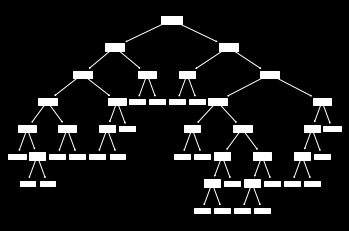

In [83]:
tree.plot_tree(model)

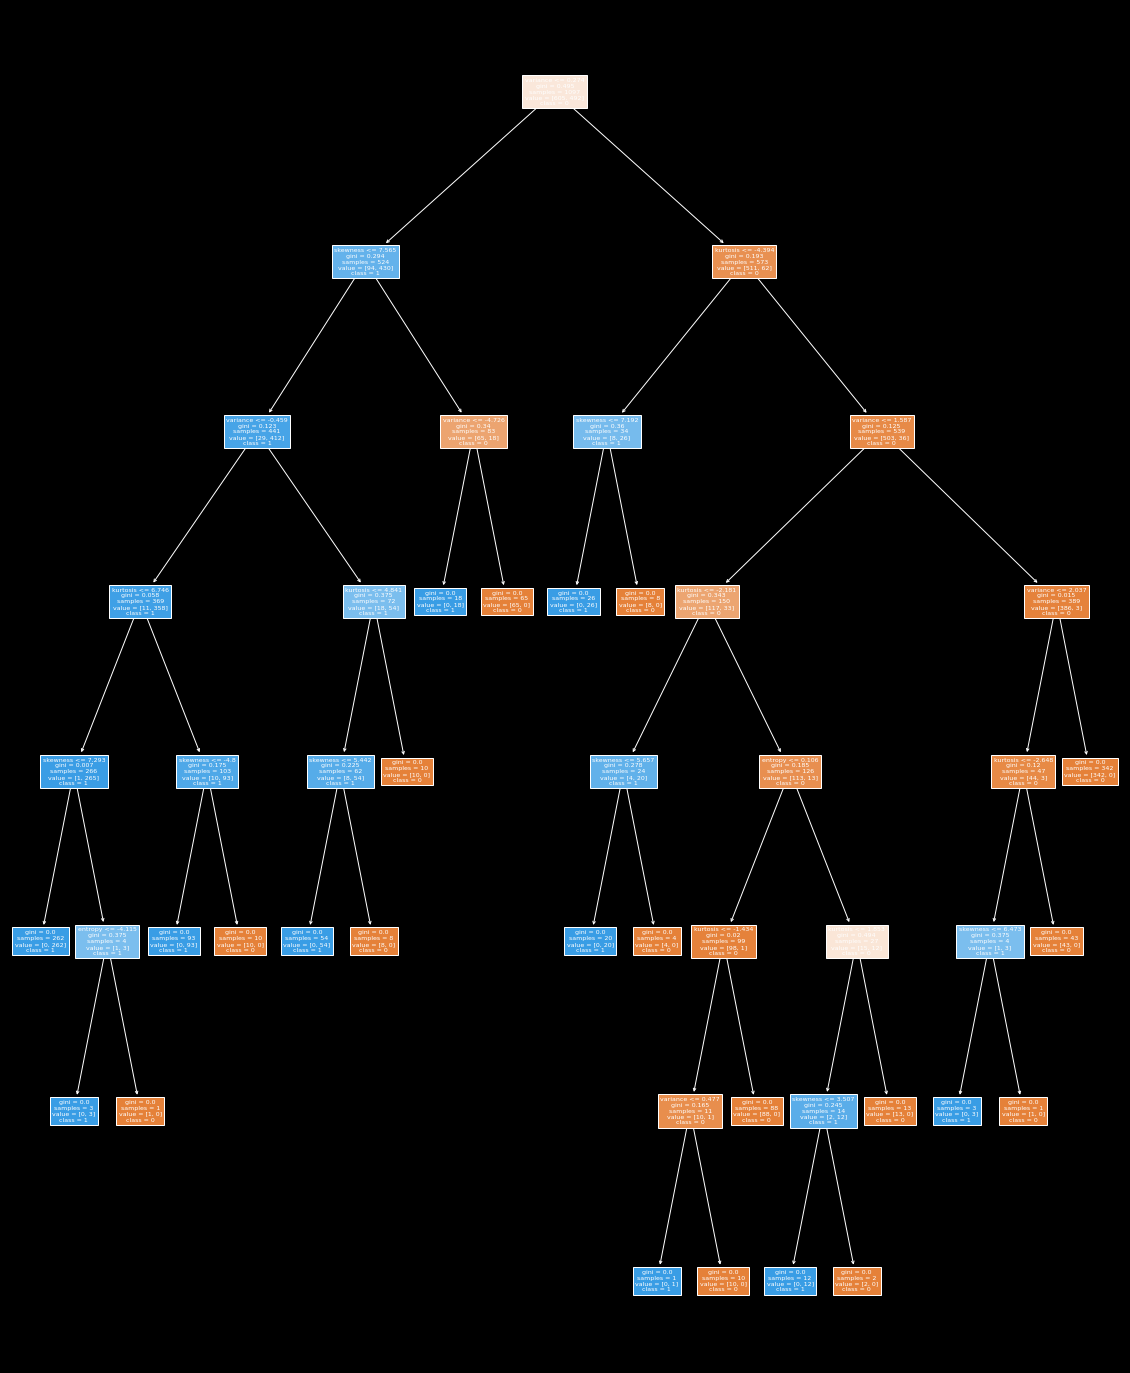

In [84]:
fn=['variance','skewness','kurtosis','entropy']
cn=['0','1']
fig= plt.figure(figsize = (20,25))
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952


In [85]:
from sklearn.metrics import log_loss

print(log_loss(Y_test, model.predict(X_test[:275])))

0.25119691630793467


Here, we can observe that the cross entropy loss of our decision tree model is 0.25

## Prunning

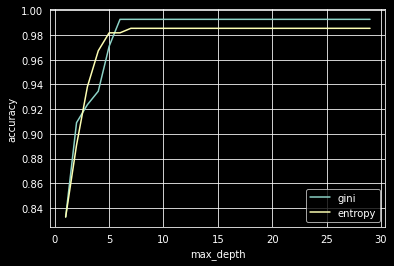

In [86]:
from sklearn.metrics import accuracy_score
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, Y_train)
 pred = dtree.predict(X_test[:275])
 acc_gini.append(accuracy_score(Y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, Y_train)
 pred = dtree.predict(X_test[:275])
 acc_entropy.append(accuracy_score(Y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [89]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dtree.fit(X_train, Y_train)
pred = dtree.predict(X_test[:275])
accuracy_score(Y_test, pred)


0.9854545454545455

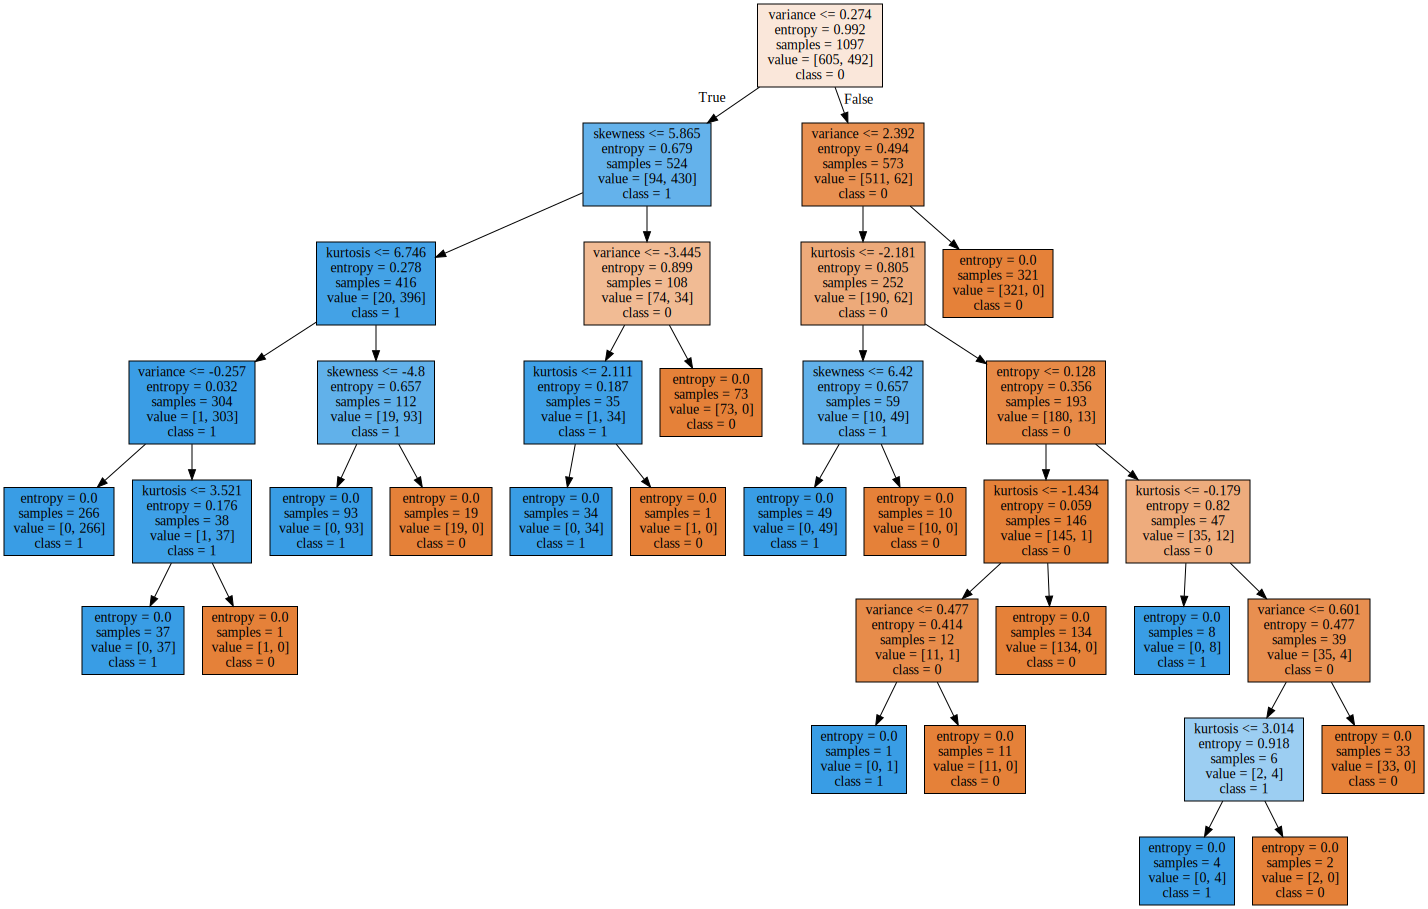

In [108]:
import graphviz
fn=['variance','skewness','kurtosis','entropy']
cn=['0','1']
classifier_tree = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=fn,  
                                class_names=cn,
                                filled=True)

# Draw graph
graph = graphviz.Source(classifier_tree, format="png") 
graph

In [103]:
import numpy as np

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dtree.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
0,variance,0.5895
1,skewness,0.2344
2,kurtosis,0.1563
3,entropy,0.0198


## Adapting the Decision tree model for Regression

In [91]:
model_2 = DecisionTreeRegressor(random_state = 0)

model_2.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [92]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, model_2.predict(X_test[:275]))
print(score)


0.9927272727272727


In [93]:
model.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
y_pred = model.predict(X_test[0:10])
print(y_pred)
print(Y_test[:10])

[1. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
1023    1
642     0
1196    1
31      0
253     0
535     0
184     0
758     0
1308    1
914     1
Name: class, dtype: int64


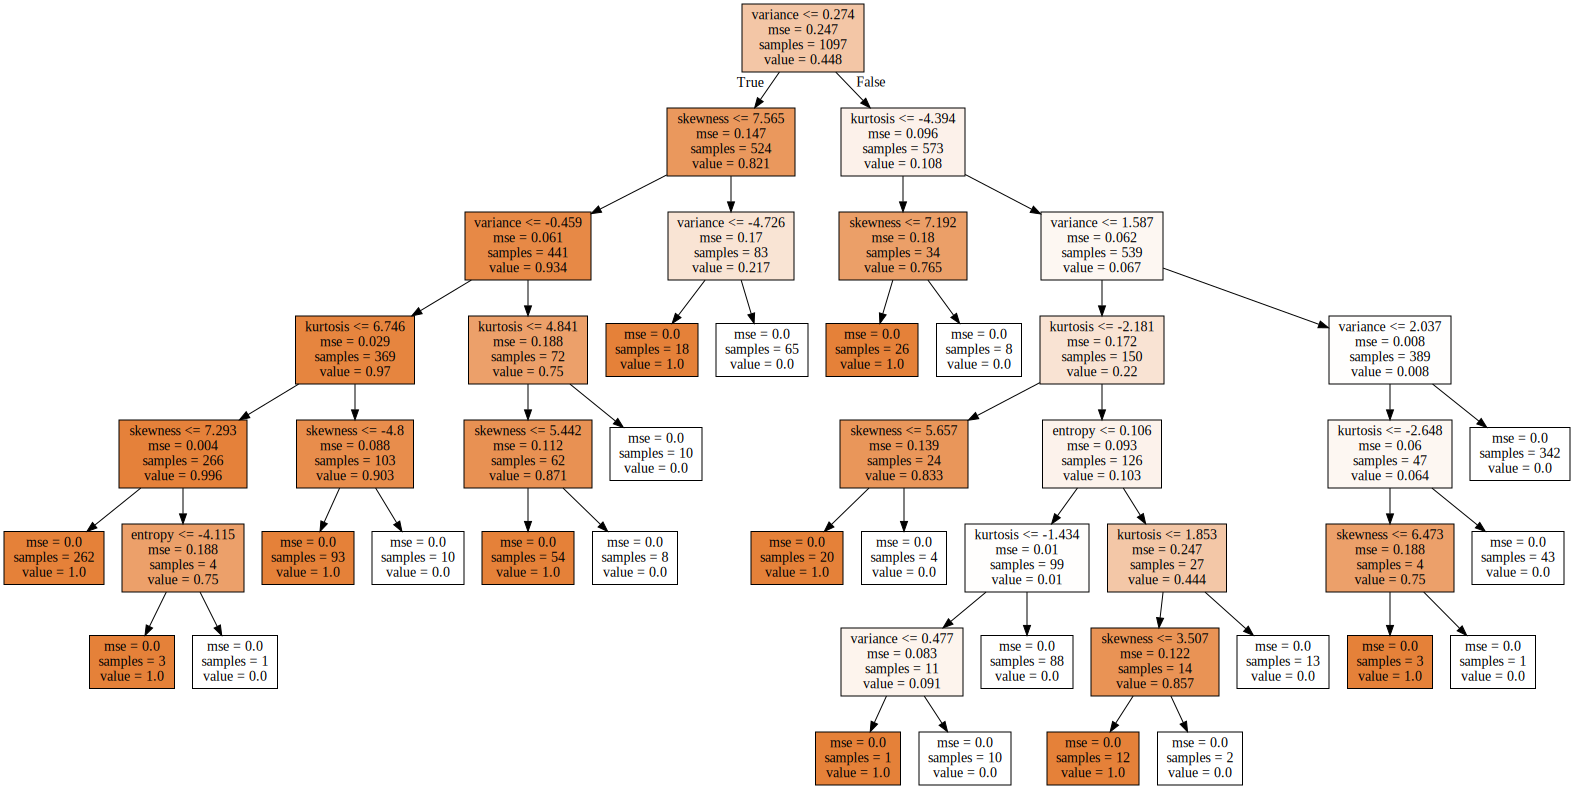

In [109]:
import graphviz
fn=['variance','skewness','kurtosis','entropy']
cn=['0','1']
regressor_tree = tree.export_graphviz(model_2, out_file=None, 
                                feature_names=fn,  
                                class_names=cn,
                                filled=True)

# Draw graph
graph = graphviz.Source(regressor_tree, format="png") 
graph